# EDA

In [28]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from linearmodels import PanelOLS
import statsmodels.api as sm
import folium
import os
import json

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import MaxNLocator, FuncFormatter

In [10]:
df = pd.read_csv('/Users/alexandrabruno/Documents/flatiron/data/IHME-GBD_2019_DATA-b82d657c-1.csv')

In [11]:
df

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Maternal mortality ratio,United States of America,Female,All Ages,Maternal and neonatal disorders,Rate,2008,26.420103,26.999201,25.742366
1,Maternal mortality ratio,United States of America,Female,All Ages,Maternal and neonatal disorders,Rate,2017,28.860973,31.004866,27.641595
2,Maternal mortality ratio,United States of America,Female,All Ages,Maternal and neonatal disorders,Rate,2019,25.862139,27.680429,24.665405
3,Maternal mortality ratio,United States of America,Female,All Ages,Maternal and neonatal disorders,Rate,2012,27.731284,28.299573,26.928769
4,Maternal mortality ratio,United States of America,Female,All Ages,Maternal and neonatal disorders,Rate,2014,29.789435,30.479080,28.874627
5,Maternal mortality ratio,United States of America,Female,All Ages,Maternal and neonatal disorders,Rate,2010,25.049636,25.568630,24.363153
6,Maternal mortality ratio,United States of America,Female,All Ages,Maternal and neonatal disorders,Rate,2016,32.358240,34.124618,31.128276
7,Maternal mortality ratio,United States of America,Female,All Ages,Maternal and neonatal disorders,Rate,2013,29.669500,30.262174,28.795101
8,Maternal mortality ratio,United States of America,Female,All Ages,Maternal and neonatal disorders,Rate,2011,26.597784,27.151582,25.868919
9,Maternal mortality ratio,United States of America,Female,All Ages,Maternal and neonatal disorders,Rate,2009,26.688709,27.272362,25.983838


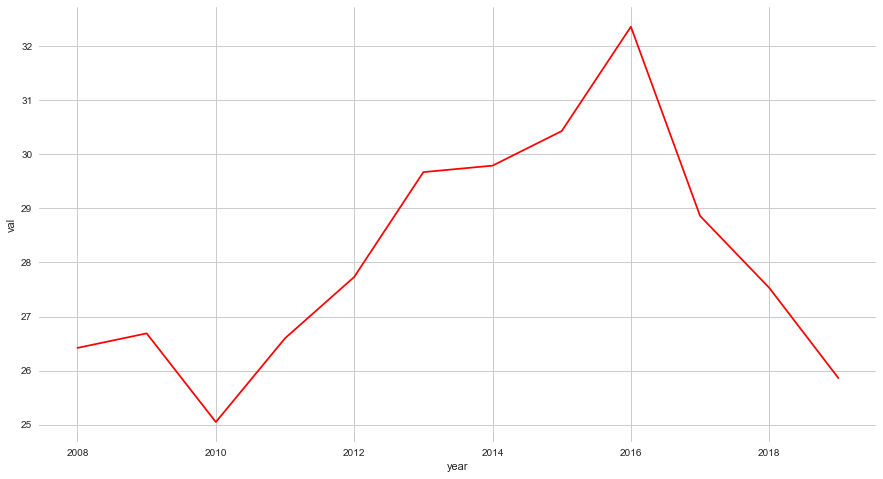

In [12]:
# Set up the defaults
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))

sns.lineplot(data=df, x="year", y="val",color = 'red')

### Map visualization

In [35]:
state_geo = os.path.join('/Users/alexandrabruno/Desktop/','us-states.json')

In [50]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [53]:
df['abbrev'] = df['location'].map(us_state_abbrev)

In [54]:
df

,measure,location,sex,age,cause,metric,year,val,upper,lower,abbrev
0,Maternal mortality ratio,New York,Female,All Ages,Maternal and neonatal disorders,Rate,2018,32.546346,41.251102,25.454796,NY
1,Maternal mortality ratio,North Carolina,Female,All Ages,Maternal and neonatal disorders,Rate,2018,23.785645,29.905453,18.527475,NC
2,Maternal mortality ratio,North Dakota,Female,All Ages,Maternal and neonatal disorders,Rate,2018,30.211908,36.031517,25.044349,ND
3,Maternal mortality ratio,Ohio,Female,All Ages,Maternal and neonatal disorders,Rate,2018,26.425790,33.259358,20.399764,OH
4,Maternal mortality ratio,Oklahoma,Female,All Ages,Maternal and neonatal disorders,Rate,2018,32.579185,41.259049,25.556163,OK
5,Maternal mortality ratio,Oregon,Female,All Ages,Maternal and neonatal disorders,Rate,2018,18.177161,23.242569,14.042546,OR
6,Maternal mortality ratio,Pennsylvania,Female,All Ages,Maternal and neonatal disorders,Rate,2018,25.727937,32.830562,19.725486,PA
7,Maternal mortality ratio,Rhode Island,Female,All Ages,Maternal and neonatal disorders,Rate,2018,20.101431,24.912314,16.086065,RI
8,Maternal mortality ratio,South Carolina,Female,All Ages,Maternal and neonatal disorders,Rate,2018,38.705250,49.880631,29.670432,SC
9,Maternal mortality ratio,South Dakota,Female,All Ages,Maternal and neonatal disorders,Rate,2018,25.789610,31.131320,21.521343,SD


In [52]:
df = pd.read_csv('/Users/alexandrabruno/Documents/flatiron/data/data_for_map.csv')

In [37]:
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)

In [58]:
# Add the color for the chloropleth:
m.choropleth(
geo_data=state_geo,
 name='choropleth',
 data=df,
 columns=['abbrev', 'val'],
 key_on='feature.id',
 fill_color='YlGnBu',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Maternal Mortality Ratio'
)
folium.LayerControl().add_to(m)

AttributeError: 'NoneType' object has no attribute 'get'

In [57]:
m

### STD rates over time

In [61]:
df = pd.read_csv('/Users/alexandrabruno/Documents/flatiron/data/cdc.csv')

In [62]:
df

,Unnamed: 0,YEAR,STATE,AGE,RTE_CHL,RTE_GON
0,0,2018,Alabama,35 to 39,115.1,79.0
1,1,2018,Alabama,45 to 49,286.0,178.4
2,2,2018,Alabama,15 to 19,653.5,325.5
3,3,2018,Alabama,20 to 24,1705.9,657.8
4,4,2018,Alabama,40 to 44,4513.2,1285.3
...,...,...,...,...,...,...
5809,5809,2000,Wyoming,45 to 49,43.6,0.0
5810,5810,2000,Wyoming,15 to 19,151.2,34.4
5811,5811,2000,Wyoming,20 to 24,404.7,41.9
5812,5812,2000,Wyoming,40 to 44,1615.2,43.7


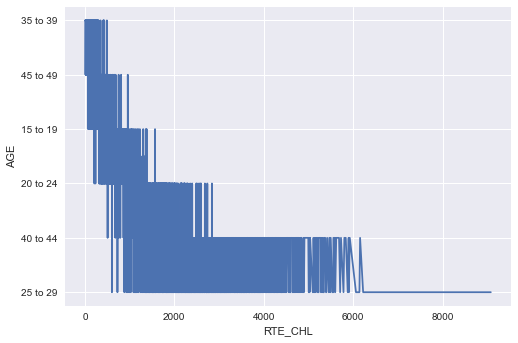

In [65]:
sns.lineplot(data=df, x="RTE_CHL", y="AGE")

In [67]:
df[df['YEAR'] == 2018]

,Unnamed: 0,YEAR,STATE,AGE,RTE_CHL,RTE_GON
0,0,2018,Alabama,35 to 39,115.1,79.0
1,1,2018,Alabama,45 to 49,286.0,178.4
2,2,2018,Alabama,15 to 19,653.5,325.5
3,3,2018,Alabama,20 to 24,1705.9,657.8
4,4,2018,Alabama,40 to 44,4513.2,1285.3
...,...,...,...,...,...,...
5701,5701,2018,Wyoming,45 to 49,211.6,59.7
5702,5702,2018,Wyoming,15 to 19,451.5,103.8
5703,5703,2018,Wyoming,20 to 24,1026.9,211.7
5704,5704,2018,Wyoming,40 to 44,3087.0,278.6


In [68]:
chl = pd.read_csv('/Users/alexandrabruno/Documents/flatiron/smaller_data/chl.csv')

### Seaborn graphs

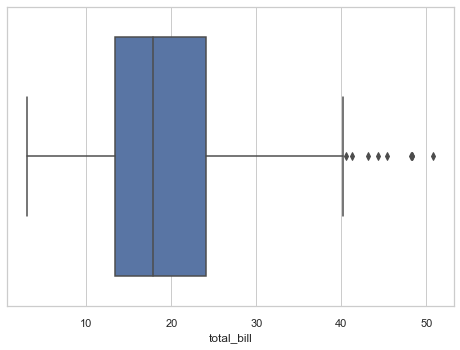

In [69]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

In [70]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)